In [13]:
# Importing Packages to run Pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.preprocessing import OneHotEncoder

#Some commented out stuff I may use later.

#from __future__ import print_function

#from sklearn.datasets import fetch_20newsgroups
#from sklearn.decomposition import TruncatedSVD
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import HashingVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR


#from sklearn.cluster import KMeans, MiniBatchKMeans

#import logging
#from optparse import OptionParser
#import sys
#from time import time

#Gets current working directory, and prints it.

# os.getcwd()
# print (os.getcwd())


In [14]:
# Data Import and Process

#This is an example of loading in a student roster from an excel, and saving it to a pickle 
#(a serialized data format that python uses) It then reads it back to prove it works.

# Bill's Original Test Code

# CalcRoster = pd.read_excel('Documents/StudentRoster.xlsx', sheet_name='Sheet1')
# CalcRoster = pd.read_excel('Documents/StudentRoster.xlsx')
# CalcRoster.head()
# CalcRoster.to_pickle('Documents/foo.pkl')

# CalcRoster2 = pd.read_pickle('Documents/foo.pkl')
# CalcRoster2.head()

# Kyle Importing Roster, Test Info Sheet, and Responses

## Importing Roster as is, column 1 = 'ID', column 2 = 'Last, First'

Roster = pd.read_excel('C2018_CalcBC_Roster.xlsx')

## Importing Info Sheet for Questions

InfoSheet = pd.read_excel('17_18_Q3_Math_AP Calculus BC_TestInfoPage_mod.xlsx', sheet_name=2, skiprows=9)
InfoSheet = InfoSheet.applymap(str)
InfoSheet_temp = InfoSheet.loc[:,['Question Number','(Primary) Standard','(Secondary) OPTIONAL: Additional Standard', 'MC, OER (Question Group)', 'Correct Answer']] 
InfoSheet = InfoSheet_temp


InfoSheet

,Question Number,(Primary) Standard,(Secondary) OPTIONAL: Additional Standard,"MC, OER (Question Group)",Correct Answer
0,1,UHAI.HS.APCalc.Derivatives.1C.Calculate,UHAI.HS.Calc.03.ChainRule,MC,A
1,2,UHAI.HS.APCalc.Integrals.3B.Calculate,UHAI.HS.Calc.06.EvaluationTh,MC,C
2,3,UHAI.HS.APCalc.Derivatives.1C.Calculate,UHAI.HS.Calc.10.ParaSlope,MC,B
3,4,UHAI.HS.APCalc.Integrals.4A.Interpret,UHAI.HS.Calc.07.IntAntiChain,MC,D
4,5,UHAI.HS.APCalc.Derivatives.1C.Calculate,UHAI.HS.Calc.03.Implicit,MC,C
5,6,UHAI.HS.APCalc.Integrals.2B.Approximate,UHAI.HS.Calc.06.IntTrapezoid,MC,A
6,7,UHAI.HS.APCalc.Derivatives.1C.Calculate,UHAI.HS.Calc.10.ParaDeriv,MC,A
7,8,UHAI.HS.APCalc.Series.1B.Sum,UHAI.HS.Calc.11.ConvGeometric,MC,B
8,9,UHAI.HS.APCalc.Integrals.2C.AreaProperties,UHAI.HS.Calc.00.Piecewise,MC,A
9,10,UHAI.HS.APCalc.Series.1A.Convergence,UHAI.HS.Calc.11.ConvPSeries,MC,A


In [15]:


## Importing 16-17 Student Responses

OldResponses = pd.read_excel('1617_APCalcBC_Q3IA_studentresponses.xls')
OldResponses = OldResponses.applymap(str)
df1 = OldResponses.loc[:,'Local Student Id']
df2 = OldResponses.loc[:,'Q1':'O6D']
list2 = [df1, df2] 
OldResponses = pd.concat(list2, axis=1)

OldResponses.head


<bound method NDFrame.head of    Local Student Id Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 ...  O4B O4C O5A O5B O5C O5D  \
0         306001153  A  C  B  A  B  A  A  B  B ...  0.0   0   2   1   0   0   
1         301001344  A  C  A  D  C  B  A  C  C ...  1.0   3   2   2   3   0   
2         303001210  A  C  A  B  C  C  A  C  C ...  nan   3   2   0   0   0   
3         301001281  C  C  C  A  C  A  A  C  A ...  1.0   2   2   2   0   0   
4         306001136  A  C  C  A  C  A  A  C  B ...  0.0   3   2   2   2   0   
5         301001284  A  C  B  A  C  A  A  B  A ...  0.0   3   2   2   0   0   
6         301001286  A  C  B  B  C  A  A  C  B ...  0.0   0   2   2   0   0   
7         301001372  A  C  A  D  C  D  A  C  C ...  0.0   1   2   2   0   0   
8         301001290  A  C  B  D  C  A  A  C  D ...  0.0   3   2   2   0   0   
9         301001219  A  C  B  A  C  A  A  C  B ...  1.0   2   2   2   0   0   
10       8268663994  A  C  B  B  C  A  A  C  B ...  0.0   3   2   2   0   0   
11        301001226  A

In [16]:
## Importing 17-18 Student Responses

NewResponses = pd.read_excel('1718_APCalcBC_Q3IA_studentresponses.xls')
NewResponses = NewResponses.applymap(str)
df1 = NewResponses.loc[:,'Local Student Id']
df2 = NewResponses.loc[:,'Q1':'O6D']
list2 = [df1, df2] 
NewResponses = pd.concat(list2, axis=1)
NewResponses.head

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


<bound method NDFrame.head of    Local Student Id Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8   Q9 ... O4B O4C O5A O5B O5C O5D  \
0         306001000  A  C  D  A  B  A  A  B    A ...   0   0   2   2   0   0   
1         301001323  C  C  C  A  C  A  A  C    C ...   0   3   2   2   0   0   
2         301001331  B  C  C  D  C  C  A  B    D ...   0   0   2   2   0   0   
3         301001502  A  C  B  D  B  A  A  C    D ...   0   3   0   2   0   1   
4         301001336  B  C  C  A  C  A  A  B    B ...   0   0   2   2   0   0   
5         303001013  A  C  B  D  C  A  A  B    A ...   1   3   2   2   1   2   
6         303001014  A  C  C  A  C  A  A  C    D ...   0   3   2   2   0   0   
7         306001234  A  C  B  A  C  A  A  B    C ...   0   3   2   2   0   0   
8         303001017  A  C  C  D  C  A  A  C    A ...   0   3   2   0   0   0   
9         301001384  A  C  D  B  B  A  A  C    B ...   0   0   2   2   0   0   
10        306001129  A  C  B  A  C  A  A  B  nan ...   0   0   2   2   0   1   
11        

In [17]:
# Run Percent Correct on a given question

InfoSheet_mat = InfoSheet.as_matrix()
NewResponses_mat = NewResponses.as_matrix()
OldResponses_mat = OldResponses.as_matrix()
AnsColumn = InfoSheet.columns.get_loc("Correct Answer")

Question = 1
CorrectAns = InfoSheet_mat[Question-1, AnsColumn]
print('Correct Answer: ', CorrectAns)

nStudents = len(NewResponses_mat[:,1])
countCorrect = 0
for i in range(0, nStudents):
    if NewResponses_mat[i, Question] == CorrectAns:
        countCorrect += 1

percentCorrect = int((10000*countCorrect/nStudents))
percentCorrect = percentCorrect/100

print('Students Correct: ', countCorrect)
print('Perent Correct: ', percentCorrect, '%')

#old starts here

nStudents2 = len(OldResponses_mat[:,1])
countCorrect2 = 0
for i in range(0, nStudents2):
    if OldResponses_mat[i, Question] == CorrectAns:
        countCorrect2 += 1

percentCorrect2 = int((10000*countCorrect2/nStudents2))
percentCorrect2 = percentCorrect2/100

print('Students Correct: ', countCorrect2)
print('Perent Correct: ', percentCorrect2, '%')

Correct Answer:  A
Students Correct:  28
Perent Correct:  77.77 %
Students Correct:  18
Perent Correct:  81.81 %


In [18]:
APResults1617 = pd.read_excel('1617_BC Scores_mod.xlsx')
APResults1617 = APResults1617.applymap(str)

df1 = APResults1617.loc[:,'Local Student Id']
df2 = APResults1617.loc[:,'Overall Score']
list3 = [df1, df2]
APResults1617 = pd.concat(list3, axis=1)
APResults1617.head

#OldResponses = pd.read_excel('1617_APCalcBC_Q3IA_studentresponses.xls')
#OldResponses = OldResponses.applymap(str)
#df1 = OldResponses.loc[:,'Local Student Id']
#df2 = OldResponses.loc[:,'Q1':'O6D']
#list2 = [df1, df2] 
#OldResponses = pd.concat(list2, axis=1)

#OldResponses.head

<bound method NDFrame.head of    Local Student Id Overall Score
0         306001153             2
1         301001344             3
2         303001210             2
3         301001281             2
4         306001136             4
5         301001284             4
6         301001286             2
7         301001372             2
8         301001290             3
9         301001219             4
10       8268663994             3
11        301001226             3
12        301001227             3
13        301001240             2
14        305001329             5
15        301001432             3
16        301001250             3
17        301001251             3
18        301001253             3
19        306001122             3
20        306001132             4
21        301001326             3>

In [19]:
OldMultipleChoice = OldResponses.loc[:,'Q1':'Q90']

SparseQuestions = pd.Series([]);
question = 0
for i in OldMultipleChoice.columns.values:
    SparseQuestions[question] = i + "A"
    SparseQuestions[question+1] = i + "B"
    SparseQuestions[question+2] = i + "C"
    SparseQuestions[question+3] = i + "D"
    question = question + 4;

SparseResponses = pd.DataFrame(0,OldMultipleChoice.index.values,SparseQuestions)

for m in OldMultipleChoice.index:
    for i in OldMultipleChoice.columns.values:
        if OldMultipleChoice.loc[m,i] == "A":
            SparseResponses.loc[m,i + "A"] = 1    
        elif OldMultipleChoice.loc[m,i] == "B":
            SparseResponses.loc[m,i + "B"] = 1    
        elif OldMultipleChoice.loc[m,i] == "C":
            SparseResponses.loc[m,i + "C"] = 1     
        elif OldMultipleChoice.loc[m,i] == "D":
            SparseResponses.loc[m,i + "D"] = 1    
            
SparseResponses


,Q1A,Q1B,Q1C,Q1D,Q2A,Q2B,Q2C,Q2D,Q3A,Q3B,...,Q88C,Q88D,Q89A,Q89B,Q89C,Q89D,Q90A,Q90B,Q90C,Q90D
0,1,0,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,0
6,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
9,1,0,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [20]:
NewMultipleChoice = NewResponses.loc[:,'Q1':'Q90']

SparseQuestions2 = pd.Series([]);
question = 0
for i in NewMultipleChoice.columns.values:
    SparseQuestions2[question] = i + "A"
    SparseQuestions2[question+1] = i + "B"
    SparseQuestions2[question+2] = i + "C"
    SparseQuestions2[question+3] = i + "D"
    question = question + 4;

SparseResponses2 = pd.DataFrame(0,NewMultipleChoice.index.values,SparseQuestions2)

for m in NewMultipleChoice.index:
    for i in NewMultipleChoice.columns.values:
        if NewMultipleChoice.loc[m,i] == "A":
            SparseResponses2.loc[m,i + "A"] = 1    
        elif NewMultipleChoice.loc[m,i] == "B":
            SparseResponses2.loc[m,i + "B"] = 1    
        elif NewMultipleChoice.loc[m,i] == "C":
            SparseResponses2.loc[m,i + "C"] = 1     
        elif NewMultipleChoice.loc[m,i] == "D":
            SparseResponses2.loc[m,i + "D"] = 1
            
SparseResponses2

,Q1A,Q1B,Q1C,Q1D,Q2A,Q2B,Q2C,Q2D,Q3A,Q3B,...,Q88C,Q88D,Q89A,Q89B,Q89C,Q89D,Q90A,Q90B,Q90C,Q90D
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
8,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [21]:
X = OldResponses.replace("nan", 0)
X = X.loc[:,'O1A':'O6D']
X = X.join(SparseResponses)

Z = NewResponses.replace("nan", 0)
Z = Z.loc[:,'O1A':'O6D']
Z = Z.join(SparseResponses2)

y = APResults1617.loc[:,'Overall Score']

X

,O1A,O1B,O1C,O1D,O2A,O2B,O2C,O2D,O3A,O3B,...,Q88C,Q88D,Q89A,Q89B,Q89C,Q89D,Q90A,Q90B,Q90C,Q90D
0,0,0,0,1,2,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
1,1,2,1,1,2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
3,0,2,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
4,0,3,0,2,2,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
5,1,2,1,2,2,0,0,0,2,1,...,1,0,1,0,0,0,0,1,0,0
6,0,3,2,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
7,0,3,0,2,1,0,0,0,2,0,...,1,0,0,0,1,0,0,1,0,0
8,1,3,2,0,1,0,0,1,1,1,...,0,0,0,0,0,1,0,1,0,0
9,1,0,0,0,2,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [22]:
## Convert MC Responses to Binary

BooleanResponses = pd.DataFrame(0,OldMultipleChoice.index.values,OldMultipleChoice.columns.values)
question = 0
for m in OldMultipleChoice.index:
    for i in OldMultipleChoice.columns.values:
        if OldMultipleChoice.loc[m,i] == InfoSheet.loc[question,'Correct Answer']:
            BooleanResponses.loc[m,i] = 1    
        else:
            BooleanResponses.loc[m,i] = 0
        question = question + 1
    question = 0
   
BooleanResponses2 = pd.DataFrame(0,NewMultipleChoice.index.values,NewMultipleChoice.columns.values)
question = 0
for m in NewMultipleChoice.index:
    for i in NewMultipleChoice.columns.values:
        if NewMultipleChoice.loc[m,i] == InfoSheet.loc[question,'Correct Answer']:
            BooleanResponses2.loc[m,i] = 1    
        else:
            BooleanResponses2.loc[m,i] = 0
        question = question + 1
    question = 0
   

In [23]:
### Create Student/MC/FRQ DataFrame

SectionSummary = pd.DataFrame(0,OldResponses.index.values,columns=['ID','MC','FRQ'])
SectionSummary.loc[:,'ID'] = OldResponses.loc[:,'Local Student Id']
FRQs = OldResponses.loc[:,'O1A':'O6D'].applymap(float)

### Find MC/FRQ Percentage
for m in SectionSummary.index:
    SectionSummary.loc[m,'MC'] = np.rint(sum(BooleanResponses.loc[m,:])/45*100)
    SectionSummary.loc[m,'FRQ'] = np.rint(sum(FRQs.loc[m,'O1A':'O6D'])/54*100)
SectionSummary

### Create Student/MC/FRQ DataFrame

SectionSummary2 = pd.DataFrame(0,NewResponses.index.values,columns=['ID','MC','FRQ'])
SectionSummary2.loc[:,'ID'] = NewResponses.loc[:,'Local Student Id']
FRQs2 = NewResponses.loc[:,'O1A':'O6D'].applymap(float)

### Find MC/FRQ Percentage
for m in SectionSummary2.index:
    SectionSummary2.loc[m,'MC'] = np.rint(sum(BooleanResponses2.loc[m,:])/45*100)
    SectionSummary2.loc[m,'FRQ'] = np.rint(sum(FRQs2.loc[m,'O1A':'O6D'])/54*100)
SectionSummary2

,ID,MC,FRQ
0,306001000,36.0,17.0
1,301001323,49.0,41.0
2,301001331,44.0,17.0
3,301001502,69.0,59.0
4,301001336,47.0,48.0
5,303001013,82.0,85.0
6,303001014,42.0,37.0
7,306001234,64.0,52.0
8,303001017,56.0,44.0
9,301001384,51.0,31.0


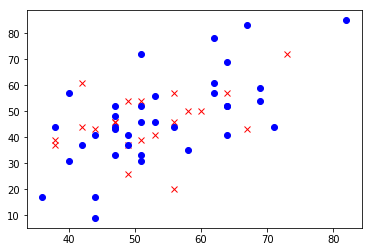

In [24]:
plt.plot(SectionSummary.loc[:,'MC'],SectionSummary.loc[:,'FRQ'], 'rx')
plt.plot(SectionSummary2.loc[:,'MC'],SectionSummary2.loc[:,'FRQ'], 'bo')
plt.show()

In [25]:
clf = RandomForestRegressor(max_depth=10, max_features="log2", random_state=0)

clf.fit(X, y)
score = metrics.r2_score(clf.predict(X), y)

print(clf.feature_importances_)
print(score)

print(clf.predict(Z))

[ 0.01871645  0.          0.02140572  0.01919025  0.          0.03894925
  0.          0.01435399  0.          0.          0.01285778  0.05028482
  0.          0.          0.01575865  0.          0.01350925  0.00303332
  0.01504508  0.00862745  0.00634615  0.          0.          0.          0.
  0.          0.          0.          0.          0.00436508  0.          0.
  0.          0.01329624  0.02470175  0.          0.          0.
  0.00089431  0.          0.          0.          0.          0.          0.
  0.0105471   0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00592105  0.00786416
  0.          0.05365854  0.          0.          0.01015385  0.
  0.02122604  0.          0.          0.          0.          0.          0.
  0.02740675  0.          0.01116751  0.          0.          0.01116751
  0.          0.          0.          0.00485294  0.          0.01929825
  0.          0.          0.          0.0039320

In [26]:
dlf = RandomForestClassifier(max_depth=2, random_state=0)

dlf.fit(X, y)
score = metrics.r2_score(dlf.predict(X), y)

print(dlf.feature_importances_)
print(score)

print(dlf.predict(Z))

[ 0.02169887  0.          0.04855316  0.          0.          0.01713166
  0.03347506  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.02213115  0.          0.          0.          0.          0.          0.
  0.          0.          0.04069767  0.          0.          0.          0.
  0.          0.          0.08557593  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.02893448  0.          0.          0.05704509
  0.          0.          0.          0.          0.02993197  0.          0.
  0.          0.          0.          0.          0.01639344  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.05101215  0.   

In [27]:
X2 = OldResponses.replace("nan", 0)
X2 = X2.loc[:,'O1A':'O6D']
X2 = X2.join(BooleanResponses)

Z2 = NewResponses.replace("nan", 0)
Z2 = Z2.loc[:,'O1A':'O6D']
Z2 = Z2.join(BooleanResponses2)

y2 = APResults1617.loc[:,'Overall Score']

X2

,O1A,O1B,O1C,O1D,O2A,O2B,O2C,O2D,O3A,O3B,...,Q81,Q82,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90
0,0,0,0,1,2,1,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
1,1,2,1,1,2,0,0,1,0,0,...,0,1,1,1,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,1,1,0,1,1,1,1,1,1,0
3,0,2,0,1,0,0,0,0,1,1,...,1,1,1,1,0,0,0,0,1,0
4,0,3,0,2,2,1,0,0,1,1,...,0,1,1,1,0,0,0,1,0,0
5,1,2,1,2,2,0,0,0,2,1,...,1,1,1,1,1,0,1,1,0,0
6,0,3,2,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,1,0
7,0,3,0,2,1,0,0,0,2,0,...,1,1,1,1,1,0,1,1,0,0
8,1,3,2,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,1,0
9,1,0,0,0,2,0,0,0,0,0,...,1,1,1,1,1,0,0,1,0,0


In [28]:
X3 = pd.DataFrame

In [29]:
elf = RandomForestRegressor(max_depth=10, max_features="auto", random_state=3)

elf.fit(X2, y2)
score = metrics.r2_score(elf.predict(X2), y2)

print(elf.feature_importances_)
print(score)

print(elf.predict(Z2))


[ 0.06150668  0.00335366  0.0178022   0.01839973  0.07811234  0.          0.
  0.          0.          0.          0.          0.07245081  0.05221476
  0.          0.          0.          0.          0.01348659  0.14926808
  0.07291005  0.11666923  0.          0.          0.          0.          0.
  0.00421456  0.03144805  0.          0.          0.0316092   0.          0.
  0.05998259  0.          0.01015496  0.          0.          0.          0.
  0.05328717  0.          0.03626772  0.00489614  0.          0.00576923
  0.01813187  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01122449  0.00838415  0.05068966
  0.          0.          0.          0.          0.          0.          0.
  0.00703437  0.01073171]
0.627414659963
[ 2.6  2.8  2.7  3.8  3.5  4.4  3.1  3.6  3.1  2.8  3.1  3.3  3.6  2.9  2.5
  3.6  3.1  3.   3.5  3.2  2.5  3.4  3.4  3.6  3.1  3.7  2.6  3.2  3.3  3.7
  3.8  3.   3.1  3.6  3.1  3.3]


In [30]:
flf = SVR(kernel="linear")
#flf = LinearRegression()

flf.fit(X2, y2)
print(flf.get_params())
score = metrics.r2_score(flf.predict(X2), y2)

#print(elf.feature_importances_)
print("The r2 of the original function is ", score)
print(y2)
print(flf.predict(X2))

print()
print("The predicted scores are:")
print(flf.predict(Z2))
print(sum(flf.predict(Z2)>3))
print((sum(flf.predict(Z2)>3))/36)


{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
The r2 of the original function is  0.983382178152
0     2
1     3
2     2
3     2
4     4
5     4
6     2
7     2
8     3
9     4
10    3
11    3
12    3
13    2
14    5
15    3
16    3
17    3
18    3
19    3
20    4
21    3
Name: Overall Score, dtype: object
[ 2.09987908  2.95544775  2.09971179  2.10018815  3.90043736  3.89959114
  1.90012739  2.1001359   2.89996949  3.89997069  3.09981656  3.02298277
  3.10010957  2.09987908  4.89994011  3.10029987  3.10035623  3.1001082
  3.09961386  3.10025407  3.89949944  2.90011203]

The predicted scores are:
[ 2.04689278  3.41121268  2.1930188   4.35011238  3.50733321  5.58093226
  2.8694509   3.8040887   2.1387982   2.26222078  3.12748661  3.54859902
  2.68270402  1.99820564  2.31810726  4.68246424  3.31077453  3.29989483
  3.81083222  3.35411735  2.56742343  4.2964419

In [31]:
# Plot outputs


In [32]:
#This merges the test data with student roster so we can eventually do things like compare one teacher's students
#to another's

# FullData = pd.merge(CalcRoster2, IAFake, how='inner', on='Student Name')
# FullData